In [4]:
def graph():
    gph = snap.LoadEdgeList(snap.TUNGraph, "facebook_combined.txt", 0, 1)
    return gph

In [3]:
import os
if os.path.isdir('plots')==False:
    os.mkdir('plots')
    
import sys 

stdoutOrigin=sys.stdout 
sys.stdout = open("answer.txt", "w")



# Q-1) (A)

In [5]:
#_number_of_nodes
import snap
gph = graph()
print(f'The number of nodes in the original graph are : {gph.GetNodes()}')

The number of nodes in the original graph are : 4039


In [6]:
#_number_of_edges
print(f'The number of edges in the original graph are : {gph.GetEdges()}')

The number of edges in the original graph are : 88234


In [7]:
def _3_is_bad(gph):
    for node in gph.Nodes():
        if node.GetId()%3 == 0:
            gph.DelNode(node.GetId())
    return gph

gph = _3_is_bad(gph)
print(f'The number of edges in the graph after removal of nodes divisible by 3 are : {gph.GetEdges()}')
print(f'The number of nodes in the graph after removal of nodes divisible by 3 are : {gph.GetNodes()}')

The number of edges in the graph after removal of nodes divisible by 3 are : 39116
The number of nodes in the graph after removal of nodes divisible by 3 are : 2692


In [8]:
gph = graph()
nodeid = gph.GetMxDegNId()
degree = 0
for node in gph.Nodes():
    if node.GetId() == nodeid:
        degree = node.GetDeg()
print(f'Maximum degree in the graph = {degree}')
for node in gph.Nodes():
    if node.GetDeg()==degree:
        print(f'The node-id with maximum degree = {node.GetId()}')

Maximum degree in the graph = 1045
The node-id with maximum degree = 107


In [9]:
gph = graph()
path_len = {}

for node in gph.Nodes():
    nodeid = node.GetId()
    shortestPath, NIdToDistH = gph.GetShortPathAll(nodeid)
    for item in NIdToDistH:
        if item != nodeid:
            length = NIdToDistH[item]
            if length not in path_len.keys():
                path_len[length] = 1
            else:
                path_len[length] += 1
                
for key in path_len.keys():
    path_len[key] = int(path_len[key]/2)

# path_len


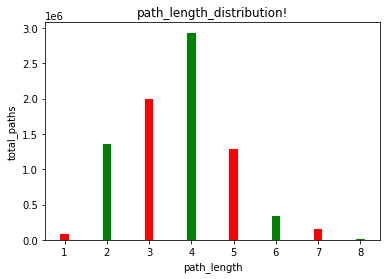

In [10]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = []
height = []
for key in path_len:
    left.append(key)
    height.append(path_len[key])
 
 
# plotting a bar chart
plt.bar(left, height,
        width = 0.2, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('path_length')
# naming the y-axis
plt.ylabel('total_paths')
# plot title
plt.title('path_length_distribution!')
 
# function to show the plot
plt.savefig('plots/degree-distribution.png')

# Q-1) (B)

In [11]:
gpha = graph()
print(f'The fraction of nodes in the largest component are {gpha.GetMxSccSz()}')

The fraction of nodes in the largest component are 1.0


In [12]:
print(f'The number of articulation points in the network are : {len(gpha.GetArtPoints())}')

The number of articulation points in the network are : 11


In [13]:
ComponentDist = gpha.GetSccSzCnt()
number_of_components = 0
mp = {}
for comp in ComponentDist:
    number_of_components += comp.GetVal2()
    mp[comp.GetVal1()] = comp.GetVal2()
print(f'The total number of connected components are : {number_of_components}')

The total number of connected components are : 1


In [14]:
maxscc = gpha.GetMxScc()
print(f'The diameter of the maximum strongly connected component is {maxscc.GetBfsFullDiam(maxscc.GetNodes())}')

The diameter of the maximum strongly connected component is 8


No handles with labels found to put in legend.


4039 1


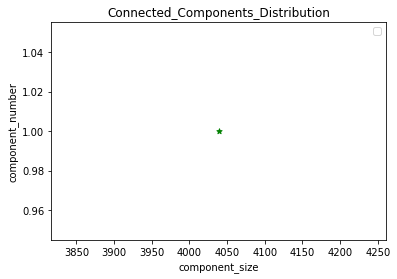

In [15]:
import matplotlib.pyplot as plt
 
left = []
height = []
for key in mp:
    left.append(key)
    height.append(mp[key])
    print(key,mp[key])
 
 
# plotting points as a scatter plot
plt.scatter(left, height, color= "green",
            marker= "*", s=30)
 
# x-axis label
plt.xlabel('component_size')
# frequency label
plt.ylabel('component_number')
# plot title
plt.title('Connected_Components_Distribution')
# showing legend
plt.legend()
 
# function to show the plot
plt.savefig('plots/Connected_Components.png')

# Q-2

In [16]:
def graph_2nd():
    gph = snap.LoadEdgeList(snap.TNGraph, "email-EuAll.txt", 0, 1)
    return gph

In [17]:
gphb = graph_2nd()

# A(a)
print(f'Number of nodes : {gphb.GetNodes()}')

#A(b)
print(f'Number of edges : {gphb.GetEdges()}')

Number of nodes : 265214
Number of edges : 420045


In [18]:
map_deg = {}
for node in gphb.Nodes():
    deg = node.GetInDeg() + node.GetOutDeg()
    if deg not in map_deg.keys():
        map_deg[deg] = 1
    else:
        map_deg[deg] += 1
print(f'Number of nodes with degree = 4 are {map_deg[4]}')
# map_deg

Number of nodes with degree = 4 are 4732


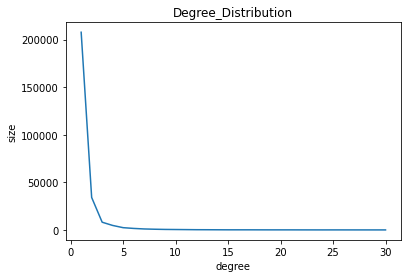

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
 
left = []
height = []
for key in sorted(map_deg.keys()):
    left.append(key)
    height.append(map_deg[key])
 
# print(left)
# plotting points as a scatter plot
# plotting a bar chart
plt.plot(left[0:30], height[0:30])
 
# x-axis label
plt.xlabel('degree')
# frequency label
plt.ylabel('size')
# plot title
plt.title('Degree_Distribution')
# showing legend
plt.show()
 
# function to show the plot
plt.savefig('plots/deg-dib.png')

In [20]:
## WCC AND SCC
MxScc = gphb.GetMxScc()
MxWcc = gphb.GetMxWcc()
print(f'The number of edges are {MxScc.GetEdges()} and nodes are {MxScc.GetNodes()} in the maximal strongest connected component.')
print(f'The number of edges are {MxWcc.GetEdges()} and nodes are {MxWcc.GetNodes()} in the maximal weakly connected component.')

The number of edges are 151930 and nodes are 34203 in the maximal strongest connected component.
The number of edges are 395270 and nodes are 224832 in the maximal weakly connected component.


In [21]:
## Triangle and Rectangle
print(f'Number of triangles are {gphb.GetTriads(-1)}')

Number of triangles are 267313


In [22]:
print(f'The average clustering coefficient is {gphb.GetClustCf(-1)}')

The average clustering coefficient is 0.06708495948944604


In [23]:
vis = set()
cur_vis = set()
cur_path = []
rectangles = 0

g = {}
for edge in gphb.Edges():
    src = edge.GetSrcNId()
    des = edge.GetDstNId()
    if src not in g.keys():
        g[src] = [des]
    else:
        g[src].append(des)
    

def dfs(at):
    global rectangles 
    cur_path.append(at)
    cur_vis.add(at)
    vis.add(at)
    if at in g.keys():
        for to in g[at]:
            if to in cur_vis:
                path_len = len(cur_path)
                if(path_len >=4 and cur_path[path_len-4] == to):
                    rectangles += 1
            elif to not in vis :
                dfs(to)
    cur_vis.remove(at)
    cur_path.pop()
    
for node in gphb.Nodes():
    nodeid = node.GetId()
    dfs(nodeid)

print(f'Number of rectangles are {rectangles}')

Number of rectangles are 437


In [ ]:
sys.stdout.close()
sys.stdout=stdoutOrigin